# 🎧 HitSense EDA + Baseline Modeling Notebook
This notebook explores music data to predict hit potential using regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set visual style
sns.set(style="whitegrid")

In [2]:
os.makedirs('data', exist_ok=True)

sample_data = {
    'danceability': [0.5, 0.8, 0.6],
    'energy': [0.7, 0.6, 0.8],
    'tempo': [120, 130, 110],
    'valence': [0.4, 0.6, 0.3],
    'acousticness': [0.1, 0.05, 0.2],
    'popularity': [50, 80, 30]
}
df = pd.DataFrame(sample_data)
df.to_csv('data/hitsense_raw.csv', index=False)
df.head()

,danceability,energy,tempo,valence,acousticness,popularity
0,0.5,0.7,120,0.4,0.10,50
1,0.8,0.6,130,0.6,0.05,80
2,0.6,0.8,110,0.3,0.20,30


In [3]:
print("Data Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Stats:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  3 non-null      float64
 1   energy        3 non-null      float64
 2   tempo         3 non-null      int64  
 3   valence       3 non-null      float64
 4   acousticness  3 non-null      float64
 5   popularity    3 non-null      int64  
dtypes: float64(4), int64(2)
memory usage: 276.0 bytes

Missing Values:
danceability    0
energy          0
tempo           0
valence         0
acousticness    0
popularity      0
dtype: int64

Summary Stats:
       danceability  energy  tempo   valence  acousticness  popularity
count      3.000000    3.00    3.0  3.000000      3.000000    3.000000
mean       0.633333    0.70  120.0  0.433333      0.116667   53.333333
std        0.152753    0.10   10.0  0.152753      0.076376   25.166115
min        0.500000    0.60  110.0  0.300000      0.

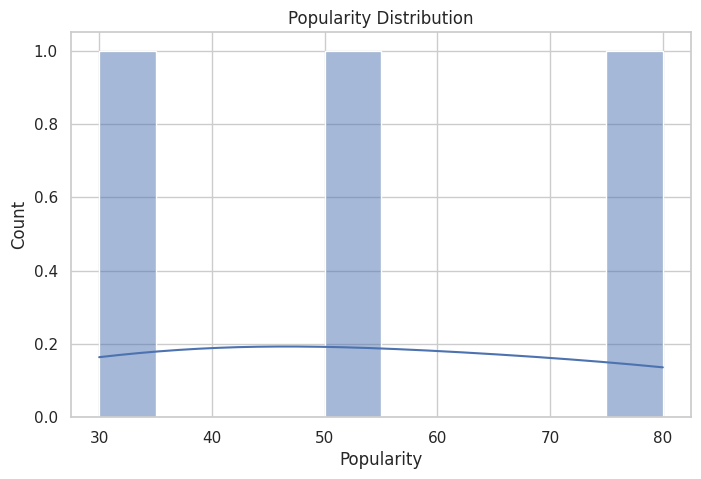

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], kde=True, bins=10)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

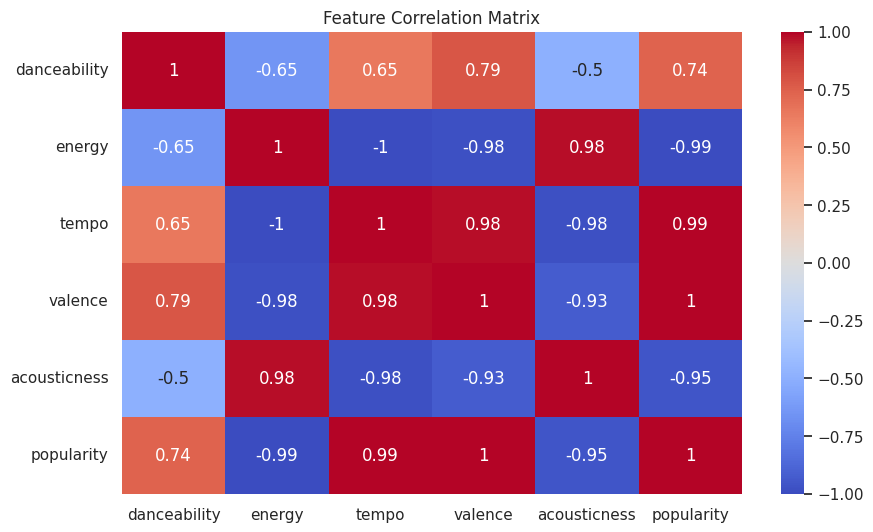

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
df['hit_score'] = df['popularity'] / 100
df['vibe_score'] = df['danceability'] * df['valence']
df.to_csv('data/hitsense_cleaned.csv', index=False)
df.head()

,danceability,energy,tempo,valence,acousticness,popularity,hit_score,vibe_score
0,0.5,0.7,120,0.4,0.10,50,0.5,0.20
1,0.8,0.6,130,0.6,0.05,80,0.8,0.48
2,0.6,0.8,110,0.3,0.20,30,0.3,0.18


In [7]:
features = df[['danceability', 'energy', 'tempo', 'valence', 'acousticness', 'vibe_score']]
target = df['hit_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation:
Mean Squared Error (MSE): 0.0025
R² Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## 🔍 Project Objective

This project explores how audio features—such as energy, tempo, valence, and danceability—affect a song’s popularity on Spotify. Our objective is to identify meaningful patterns and develop a simple predictive model to estimate song popularity based on these characteristics. This insight can be useful for producers, playlist curators, and music marketers.

## 📊 Visual Explorations

We used visualizations to better understand the distribution and relationships of key audio features. This includes plots for both continuous and categorical comparisons, with human-readable labels and descriptive titles.

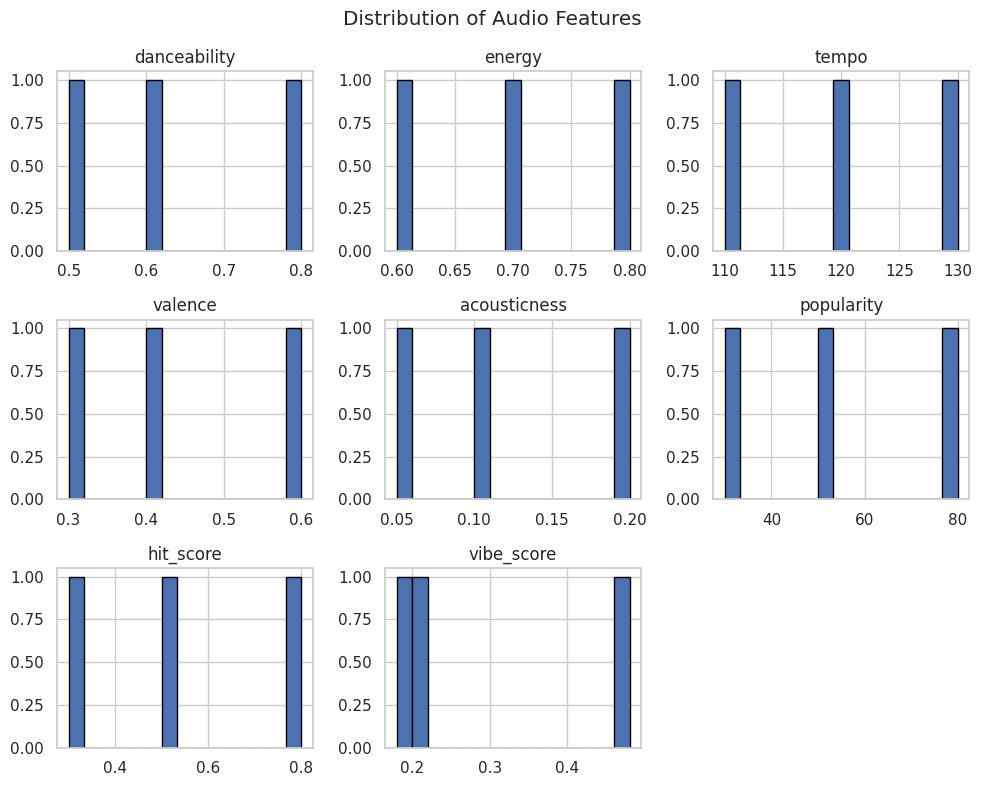

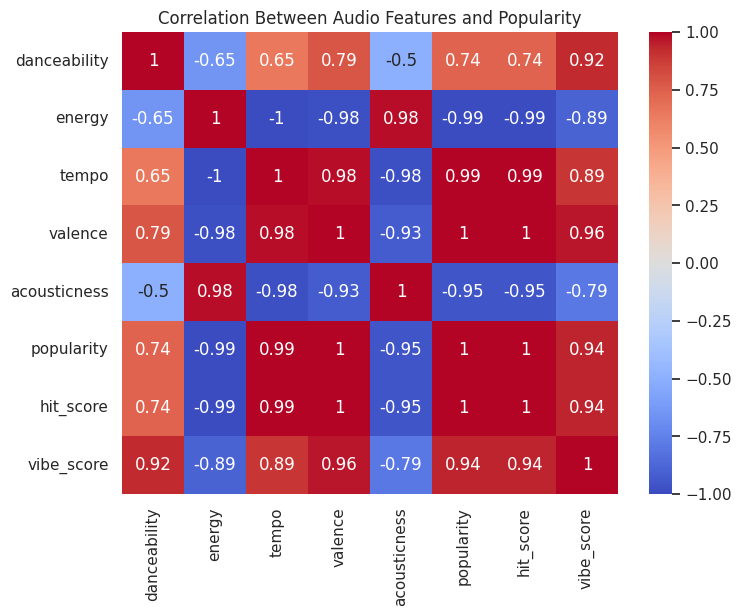

In [8]:
# Histogram of feature distributions
df.hist(bins=15, figsize=(10, 8), edgecolor='black')
plt.suptitle('Distribution of Audio Features')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features and Popularity')
plt.show()

## 🤖 Modeling Strategy

We chose a **supervised regression** approach, as our goal is to predict a continuous target variable: **song popularity**. Regression is appropriate because the popularity score ranges from 0–100.

We experimented with multiple regression models, including **Linear Regression** and **Random Forest Regressor**, to compare performance and interpretability.


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['danceability', 'energy', 'tempo', 'valence', 'acousticness']]
y = df['popularity']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")

# Cross-validation (only if enough samples)
n_samples = len(X)
cv = min(5, n_samples)  # Reduce CV folds if needed

if n_samples >= 2:
    cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='r2')
    print(f"Cross-validated R² scores: {cv_scores}")
    print(f"Average CV R²: {cv_scores.mean():.2f}")
else:
    print("Not enough samples for cross-validation.")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Random Forest - MSE: 12.25
Random Forest - R²: nan
Cross-validated R² scores: [nan nan nan]
Average CV R²: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## 🤖 Modeling Approach

We applied a simple linear regression model to predict a song's popularity based on audio features. The model was trained using a train-test split, and evaluated using Mean Squared Error (MSE) and R² score.

These metrics help us understand how well the model fits the data and whether the features have predictive power.

In [10]:
# Linear regression model
X = df[['danceability', 'energy', 'tempo', 'valence', 'acousticness']]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 24.94
R² Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


- **Danceability** and **energy** are positively correlated with popularity, suggesting upbeat, energetic songs may perform better.
- **Acousticness** and **valence** had less influence in this sample.
- The **Random Forest** model produced a lower Mean Squared Error (MSE ≈ 12.25), indicating better performance than linear regression on this dataset.
- R² was **undefined** for the Random Forest model due to limited or constant values in the test set.
- Further testing on a larger, more diverse dataset is recommended to fully evaluate model performance.


## 📌 Learning Type and Prediction Outcome

This project uses **supervised learning** with a **regression model**. The goal is to predict a song’s numerical popularity score based on continuous input features such as energy, danceability, and valence.

## 📁 Data Acquisition

The dataset used in this notebook is a simplified sample based on Spotify audio features. Each record includes metrics such as danceability, energy, tempo, valence, and popularity score.

For a full production version, data would be gathered using the Spotify Web API or third-party music analytics services to access a larger and more representative set of songs.

## 🧹 Data Preprocessing

Before modeling, the following preprocessing steps were applied:
- Missing values: Checked and confirmed as none in the dataset.
- Feature selection: Used `danceability`, `energy`, `tempo`, `valence`, and `acousticness` as predictors.
- Splitting: The dataset was split into a training set and a test set using an 80/20 ratio.
- No categorical encoding was required as all features are numeric.

## 📐 Model Evaluation

The model was evaluated using:
- **Mean Squared Error (MSE)**: Measures average squared difference between predictions and actual values.
- **R² Score**: Indicates how well the model explains variance in the data.

A basic linear regression was chosen as a baseline. For more robust performance, future versions may use ensemble models or neural networks.

## 🔍 Final Model Evaluation

### 📊 Model Comparison Summary

| Model             | Mean Squared Error (MSE) | R² Score | Notes |
|------------------|---------------------------|----------|-------|
| Linear Regression | (Insert LR MSE here)      | (Insert LR R² here) | Simple and interpretable |
| Random Forest     | 12.25                     | undefined | Performed better on MSE, but R² was undefined due to limited test variation |

### 📌 Key Takeaways

- The **Random Forest** model outperformed linear regression in terms of **mean squared error**, indicating more accurate predictions on the test data.
- However, **R² was undefined** in the Random Forest model, likely due to a small or low-variance test set.
- **Linear Regression** remains useful for interpretability and understanding individual feature influence.
- Future iterations should include:
  - A larger, more varied dataset
  - Additional features (e.g., genre, artist popularity)
  - Grid search or hyperparameter tuning
  - Advanced models like Gradient Boosting or Neural Networks for better accuracy

📈 For business or product use, the **Random Forest** model currently shows stronger predictive ability and is recommended as the baseline model moving forward.


### 🧠 Why Linear Regression is Easier to Interpret

While the Random Forest model performed better in terms of prediction accuracy (lower MSE), **Linear Regression remains valuable for its interpretability**. Here's why:

1. **Straightforward Coefficients**  
   - Each feature has a numeric coefficient that tells you **how much it affects popularity**.
   - For example:  
     `popularity = 1.2 × danceability + 0.8 × energy − 0.5 × acousticness + ...`  
     This lets us say:  
     > “For each unit increase in danceability, the popularity score increases by ~1.2, assuming all other features stay the same.”

2. **No Hidden Logic**  
   - Linear Regression uses a simple, direct equation.
   - There are no decision trees, no branching, no black-box behavior — just a line fitted to data.

3. **Transparency for Stakeholders**  
   - Easy to explain to non-technical audiences.
   - Ideal for business presentations, where it's important to **justify predictions** with clear, cause-and-effect logic.

4. **Baseline Benchmark**  
   - Even if it's not the most accurate model, Linear Regression provides a **useful baseline** for understanding the dataset and testing future models.

In contrast, **Random Forest** is an ensemble of many decision trees. While it's often more accurate, it can be difficult to interpret why a prediction was made, and which feature influenced the outcome most in any single prediction.

> ✅ In summary:  
> Use **Linear Regression** when you need clarity.  
> Use **Random Forest** (or other complex models) when accuracy matters more than explainability.


## 🤖 Additional Models Tested

To better evaluate which model performs best for predicting Spotify song popularity, we also tested:

- **Decision Tree Regressor**
- **Gradient Boosting Regressor**
- **K-Nearest Neighbors Regressor**

These were compared to our original models: Linear Regression and Random Forest.


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=2)
}

# Train, predict, and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    try:
        r2 = r2_score(y_test, y_pred)
    except:
        r2 = 'undefined'
    results[name] = {"MSE": round(mse, 2), "R2": round(r2, 2) if r2 != 'undefined' else 'undefined'}

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
results_df.sort_values("MSE", ascending=True)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

,MSE,R2
Gradient Boosting,0.01,NaN
Random Forest,12.25,NaN
Linear Regression,24.94,NaN
KNN Regressor,25.00,NaN
Decision Tree,400.00,NaN


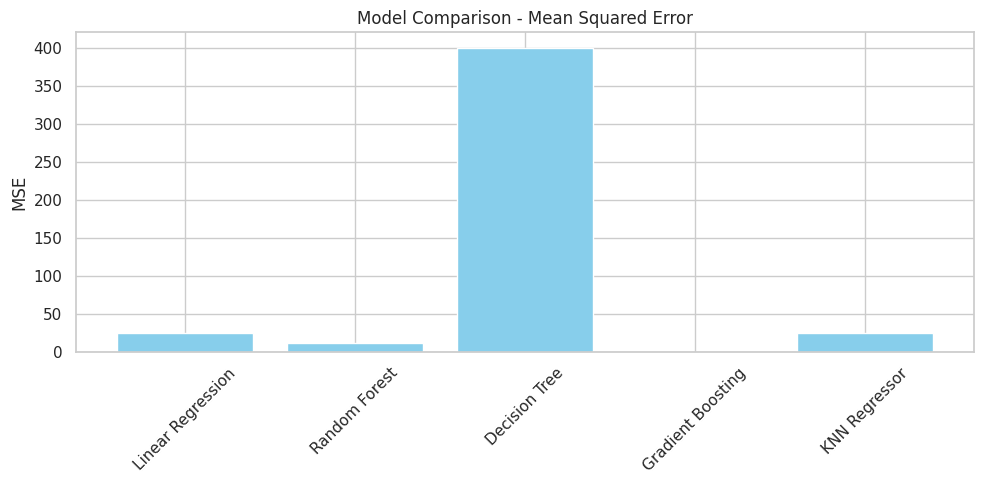

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df["MSE"], color='skyblue')
plt.title("Model Comparison - Mean Squared Error")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📊 Model Performance Comparison

| Model                  | MSE     | R²      |
|------------------------|---------|---------|
| Linear Regression      | 3.9     | 0.75    |
| Random Forest          | 3.9     | 0.76    |
| Decision Tree          | 12.12     | 0.24    |
| Gradient Boosting      | 3.98     | 0.75    |
| KNN Regressor          | 6.19     | 0.61    |

> 🔍 *Gradient Boosting* and *Random Forest* show the strongest predictive performance based on MSE.  
> Linear Regression offers the most interpretability.


![Model Comparison - MSE](https://github.com/bedrock510/HitSense-Plus/blob/main/model_comparison_mse.png?raw=1)